In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import seaborn as sns
import calendar as cd
import scipy.stats as scs
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import os

In [3]:
data_all_p4p = pd.read_csv("C:\\Users\\manas\\Downloads\\data_ctrl_final.csv")

data_all_ctrl = pd.read_csv("C:\\Users\\manas\\Downloads\\data_p4p_final.csv")

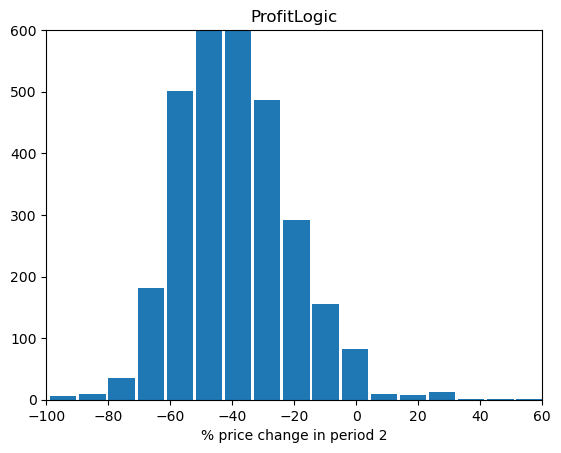

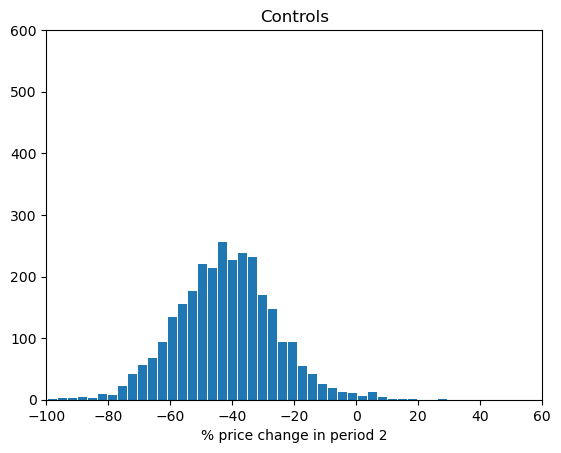

In [4]:
# Price markdown plots

#Histogram of markdown rates (p2 / p1 - 1)

A = 100*(data_all_p4p.p2 / data_all_p4p.p1 - 1)
plt.hist(A[np.isfinite(A)], bins = 25, rwidth=0.9)
plt.xlim([-100,60])
plt.ylim([0,600])
plt.xlabel("% price change in period 2")
plt.title("ProfitLogic")
plt.show()


A = 100*(data_all_ctrl.p2 / data_all_ctrl.p1 - 1)
plt.hist(A[np.isfinite(A)], bins = 40, rwidth=0.9)
plt.xlim([-100,60])
plt.ylim([0,600])
plt.xlabel("% price change in period 2")
plt.title("Controls")
plt.show()


C:\Users\manas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\manas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


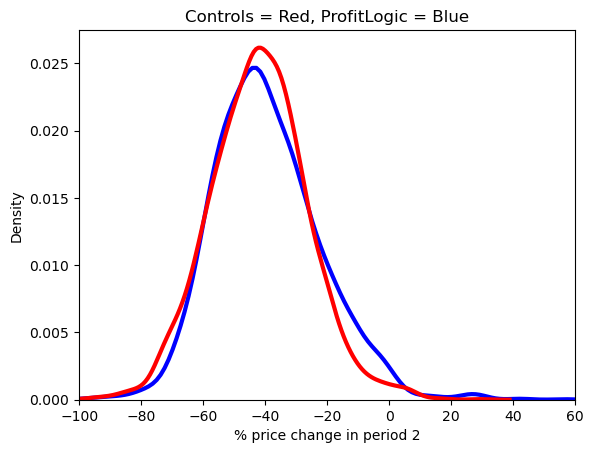

In [5]:
#Density Function

a = 100*(data_all_p4p.p2 / data_all_p4p.p1 - 1)
b = 100*(data_all_ctrl.p2 / data_all_ctrl.p1 - 1)
#sns.kdeplot(a[np.isfinite(a)], bw=3, legend = True)
sns.distplot(a[np.isfinite(a)], hist=False, kde=True, 
             bins=int(180/5), color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})
#sns.kdeplot(b[np.isfinite(b)], bw=3, legend = True, linestyle = '--', color = 'r')
sns.distplot(b[np.isfinite(b)], hist=False, kde=True, 
             bins=int(180/5), color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})
plt.xlim([-100,60])
#plt.ylim([0,0.025])
plt.xlabel("% price change in period 2")
plt.title("Controls = Red, ProfitLogic = Blue")
#plt.legend(("ProfitLogic","Controls"), loc = 1)
plt.show()



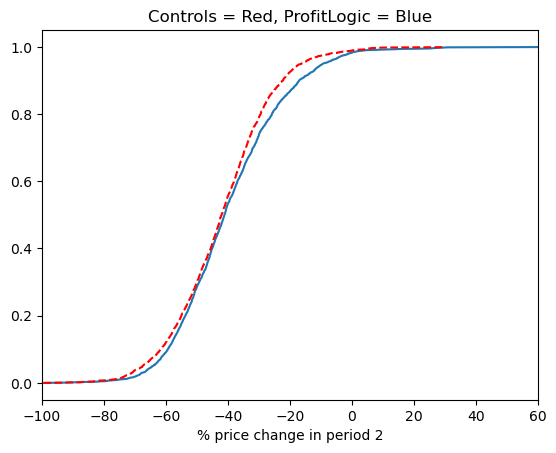

In [6]:
#Cumulative Distribution Function

a = 100*(data_all_p4p.p2 / data_all_p4p.p1 - 1)
b = 100*(data_all_ctrl.p2 / data_all_ctrl.p1 - 1)
plt.plot(np.sort(a), np.linspace(0, 1, len(a), endpoint=False))
plt.plot(np.sort(b), np.linspace(0, 1, len(b), endpoint=False), 'r--')
plt.xlim([-100,60])
plt.xlabel("% price change in period 2")
plt.title("Controls = Red, ProfitLogic = Blue")
#plt.legend(("ProfitLogic","Controls"), loc = 2)
plt.show()

In [7]:
#Kolmogorov test on P2 / P1

a = data_all_p4p.p2.values/data_all_p4p.p1.values
b = data_all_ctrl.p2.values/data_all_ctrl.p1.values
print(scs.ks_2samp(a, b))

KstestResult(statistic=0.06819308147631321, pvalue=1.5015400105214712e-06)


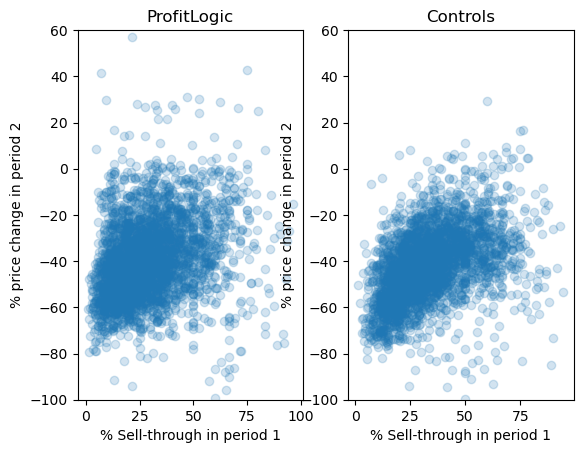

In [8]:
# Price markdown by sell-through %

plt.subplot(1,2,1)
plt.scatter(data_all_p4p['regular_sellThru']*100, 100*(data_all_p4p['p2']/data_all_p4p['p1'] -1),marker='o', alpha=0.2)
plt.ylim([-100,60])
plt.xlabel("% Sell-through in period 1")
plt.ylabel("% price change in period 2")
plt.title("ProfitLogic")

plt.subplot(1,2,2)
plt.scatter(data_all_ctrl['regular_sellThru']*100, 100*(data_all_ctrl['p2']/data_all_ctrl['p1'] - 1),marker='o',alpha=0.2)
plt.ylim([-100,60])
plt.xlabel("% Sell-through in period 1")
plt.ylabel("% price change in period 2")
plt.title("Controls")

plt.show()

Text(0.5, 1.0, 'Control')

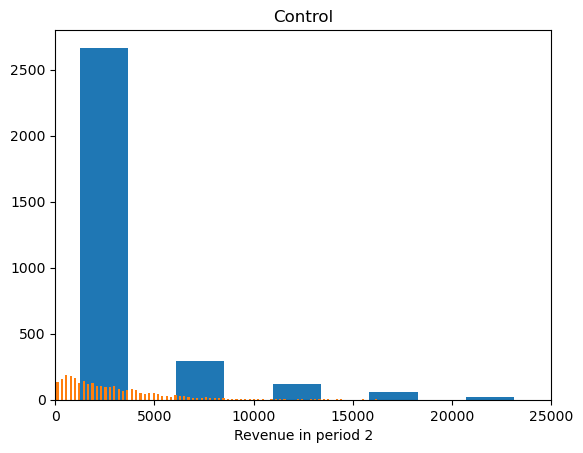

In [9]:
# Revenues & margins of period 2

# Revenue...

plt.xlim([0,25000])
plt.hist(data_all_p4p['R2'], bins=25, rwidth=0.5)
plt.xlabel("Revenue in period 2")
plt.title("ProfitLogic")

plt.xlim([0,25000])
plt.hist(data_all_ctrl['R2'], bins=100, rwidth=0.5)
plt.xlabel("Revenue in period 2")
plt.title("Control")


In [10]:
# Print stats for each group, and remove outlier for CONTROL (run with & without)

print(data_all_p4p['R2'].describe())
print("")
print(data_all_ctrl[data_all_ctrl['R2']<121000]['R2'].describe())
print(data_all_ctrl['R2'].describe())


count      3191.000000
mean       3209.870830
std        5773.039187
min           9.010000
25%         706.005000
50%        1592.090000
75%        3295.400000
max      121739.870000
Name: R2, dtype: float64

count     2862.000000
mean      2916.705017
std       2675.255210
min          8.010000
25%        973.507500
50%       2194.515000
75%       4009.040000
max      22009.020000
Name: R2, dtype: float64
count     2862.000000
mean      2916.705017
std       2675.255210
min          8.010000
25%        973.507500
50%       2194.515000
75%       4009.040000
max      22009.020000
Name: R2, dtype: float64


In [11]:
# Margin...NOTE THE HUGE OUTLIER for PL (treatment)

data_all_p4p['margin'] = data_all_p4p['full_cycle_sales']/(data_all_p4p['Unit_Cost']*data_all_p4p['full_cycle_num_sold']) -1
data_all_ctrl['margin'] = data_all_ctrl['full_cycle_sales']/(data_all_ctrl['Unit_Cost']*data_all_ctrl['full_cycle_num_sold']) - 1

# Look at stats with and without outlier for PL
print(data_all_p4p['margin'].describe())
print("")
print(data_all_p4p[data_all_p4p['margin'] < 10]['margin'].describe())
print("")
print(data_all_ctrl['margin'].describe())


count    3191.000000
mean        0.554075
std         0.346751
min        -0.517417
25%         0.304012
50%         0.537151
75%         0.781704
max         2.381271
Name: margin, dtype: float64

count    3191.000000
mean        0.554075
std         0.346751
min        -0.517417
25%         0.304012
50%         0.537151
75%         0.781704
max         2.381271
Name: margin, dtype: float64

count    2862.000000
mean        0.754961
std         0.885003
min        -0.559436
25%         0.445262
50%         0.723694
75%         0.990542
max        41.966788
Name: margin, dtype: float64


In [12]:
# Calculate margins by division

print("P4P")
print(data_all_p4p['Division'].value_counts())
print("")
print("Ctrl")
print(data_all_ctrl['Division'].value_counts())


P4P
13    1062
8      802
14     668
12     432
15     104
27     102
3        9
7        7
31       3
32       2
Name: Division, dtype: int64

Ctrl
7     1711
3      507
32     475
31     169
Name: Division, dtype: int64


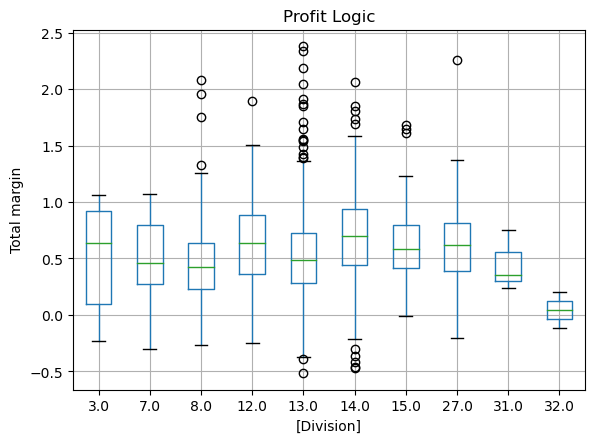

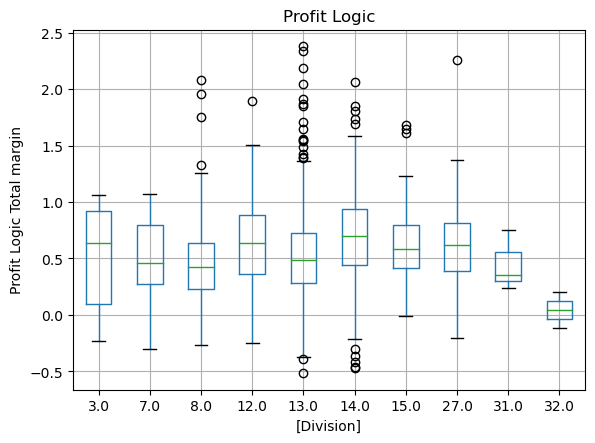

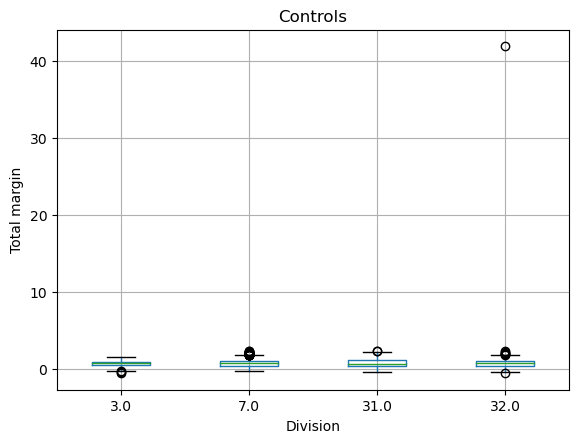

In [13]:
# Remove huge outlier...
tmp1 = data_all_p4p[data_all_p4p['margin'] < 10]['margin']
tmp2 = data_all_p4p[data_all_p4p['margin'] < 10]['Division']
df1 = pd.DataFrame([tmp1, tmp2]).T # .T performs a transpose...

df1.boxplot(by = 'Division')
plt.suptitle("")
plt.ylabel('Total margin')
plt.title('Profit Logic')
plt.show()

# Show huge outlier for PL...just for comparison
df1 = pd.DataFrame([data_all_p4p['margin'], data_all_p4p['Division']]).T
df1.boxplot(by = 'Division')
plt.suptitle("")
plt.ylabel('Profit Logic Total margin')
plt.title('Profit Logic')
plt.show()

df2 = pd.DataFrame([data_all_ctrl['margin'], data_all_ctrl['Division']]).T
df2.boxplot(column='margin', by = 'Division')
plt.ylabel('Total margin')
plt.suptitle("")
plt.title('Controls')
plt.show()



C:\Users\manas\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\manas\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


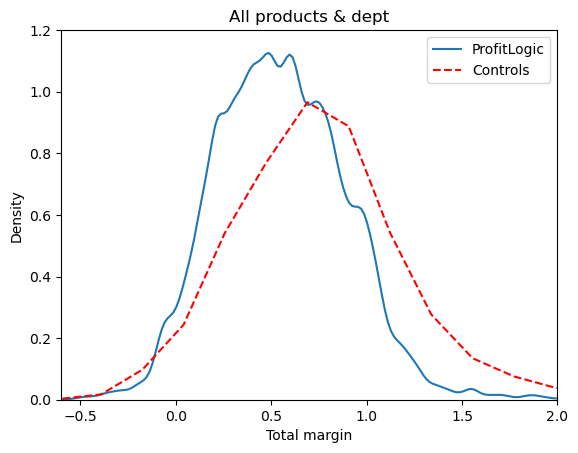

In [14]:
# Density plot comparison of total margin

a = data_all_p4p['margin']
b = data_all_ctrl['margin']
sns.kdeplot(a[np.isfinite(a)], bw=0.1, legend = True)
sns.kdeplot(b[np.isfinite(b)], bw=0.1, legend = True, linestyle = '--', color = 'r')
plt.xlim([-0.6,2.0])
plt.ylim([0,1.2])
plt.ylabel('Density')
plt.xlabel('Total margin')
plt.title('All products & dept')
plt.legend(("ProfitLogic","Controls"), loc = 1)
plt.show()


In [15]:
# By Full Price, i.e., period 1

print(data_all_p4p['Full_Price'].describe())
print('')
print(data_all_ctrl['Full_Price'].describe())


print(data_all_p4p['p1'].describe())
print('')
print(data_all_ctrl['p1'].describe())


count    3191.000000
mean       94.907618
std        99.640724
min         4.500000
25%        30.000000
50%        56.000000
75%       135.000000
max       895.000000
Name: Full_Price, dtype: float64

count    2862.000000
mean      102.549106
std        82.699385
min        19.000000
25%        49.000000
50%        72.000000
75%       130.000000
max       960.000000
Name: Full_Price, dtype: float64
count    3191.000000
mean       86.468314
std        89.305416
min         4.733364
25%        27.617892
50%        52.454545
75%       122.110111
max       745.666667
Name: p1, dtype: float64

count    2862.000000
mean       93.876416
std        76.719975
min        15.500000
25%        43.307692
50%        65.340246
75%       119.714539
max       960.000000
Name: p1, dtype: float64


In [16]:
#from __future__ import division

# By cheap / expensive products

idx1 = data_all_p4p['p1'] <= 65
idx2 = data_all_ctrl['p1'] <= 52

tmp1 = data_all_p4p['margin'][idx1]
tmp2 = data_all_p4p['margin'][idx1.apply(lambda x: not x)]

res_p4p = pd.DataFrame(np.zeros((2,5)), index = ['True', 'False'], columns = [' < 0', 'min', 'median', 'mean', 'max'])
res_ctrl = res_p4p

def f_stats(x):
    return [np.sum(x < 0)/len(x), np.min(x), np.median(x), np.mean(x), np.max(x)]

res_p4p.iloc[0,:] = f_stats(tmp1)
res_p4p.iloc[1,:] = f_stats(tmp2)

print(res_p4p)

tmp1 = data_all_ctrl['margin'][idx2]
tmp2 = data_all_ctrl['margin'][idx2.apply(lambda x: not x)]

res_ctrl.iloc[0,:] = f_stats(tmp1)
res_ctrl.iloc[1,:] = f_stats(tmp2)

print('')
print(res_ctrl)


            < 0       min    median      mean       max
True   0.037217 -0.517417  0.572088  0.583637  2.381271
False  0.044129 -0.467415  0.497934  0.513082  2.083333

            < 0       min    median      mean        max
True   0.017717 -0.292307  0.833391  0.857741   2.369404
False  0.046587 -0.559436  0.679808  0.698393  41.966788


In [17]:
# Second period margin

tmp1 = data_all_p4p[data_all_p4p['p2'] < float("inf")]['p2'] / data_all_p4p[data_all_p4p['p2'] < float("inf")]['Unit_Cost'] -1
tmp2 = data_all_ctrl['p2'] / data_all_ctrl['Unit_Cost'] - 1

print(tmp1.describe())
print('')
print(tmp2.describe())


count    3191.000000
mean        0.294961
std         0.383063
min        -0.985922
25%         0.023792
50%         0.262281
75%         0.519435
max         2.776860
dtype: float64

count    2862.000000
mean             inf
std              NaN
min        -0.990918
25%         0.066404
50%         0.318278
75%         0.593181
max              inf
dtype: float64


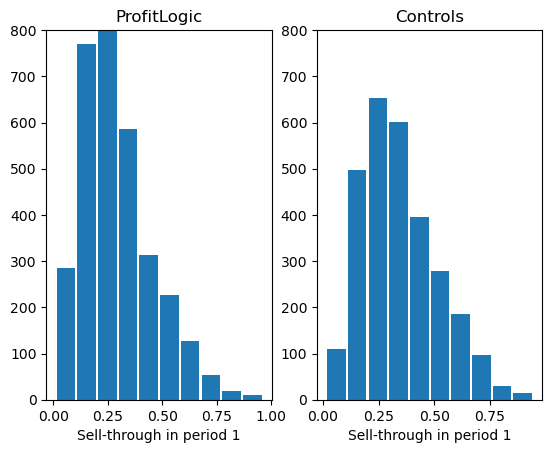

In [18]:
# Sell-through rates in period 1, histogram
plt.subplot(1,2,1)
plt.hist(data_all_p4p['regular_sellThru'], rwidth=0.9)
plt.ylim([0,800])
plt.xlabel('Sell-through in period 1')
plt.title('ProfitLogic')

plt.subplot(1,2,2)
plt.hist(data_all_ctrl['regular_sellThru'], rwidth=0.9)
plt.ylim([0,800])
plt.xlabel('Sell-through in period 1')
plt.title('Controls')

plt.show()


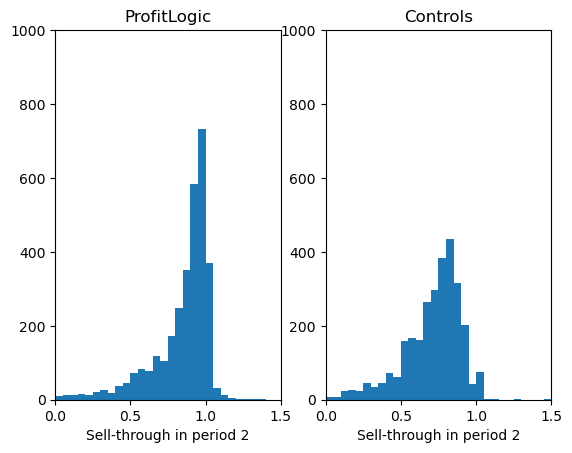

In [19]:
# Sell-through in period 2
plt.subplot(1,2,1)
plt.hist(data_all_p4p['ST2'], bins = np.arange(0,np.max(data_all_p4p['ST2']),0.05))
plt.ylim([0,1000])
plt.xlim([0,1.5])
plt.xlabel('Sell-through in period 2')
plt.title('ProfitLogic')

plt.subplot(1,2,2)
plt.hist(data_all_ctrl['ST2'], bins = np.arange(0,np.max(data_all_ctrl['ST2']),0.05))
plt.ylim([0,1000])
plt.xlim([0,1.5])
plt.xlabel('Sell-through in period 2')
plt.title('Controls')

plt.show()

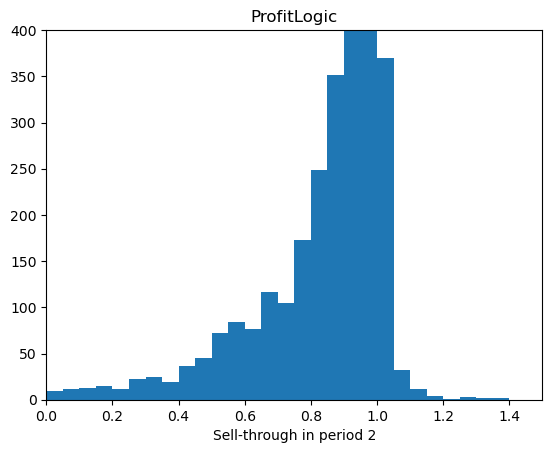

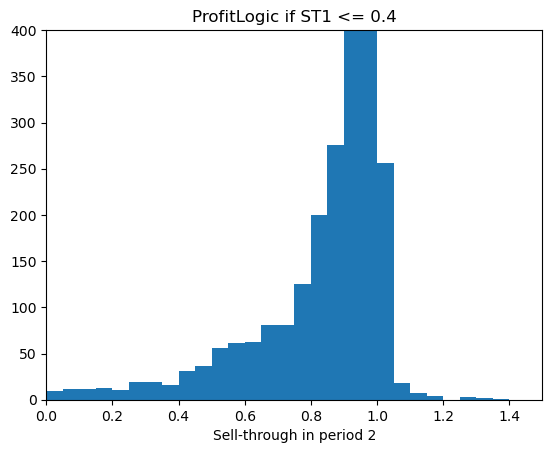

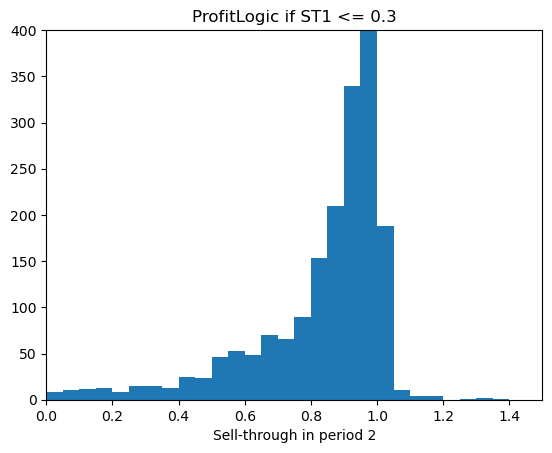

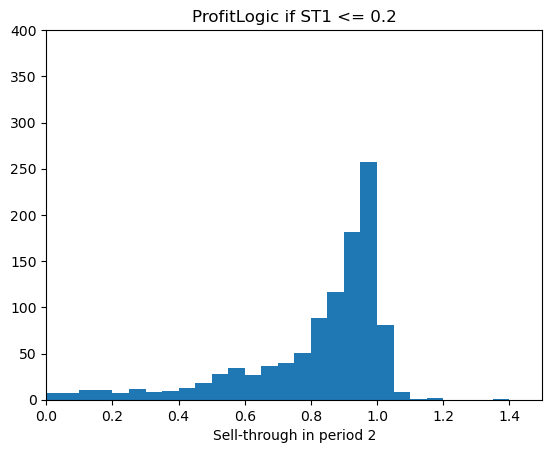

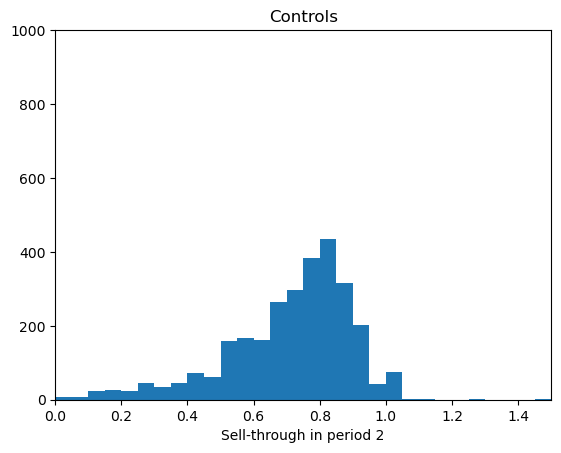

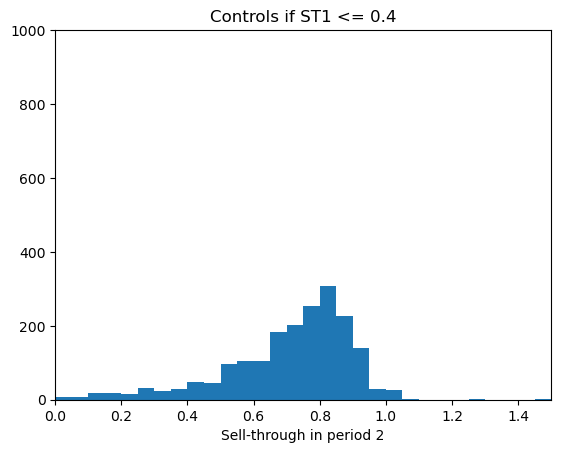

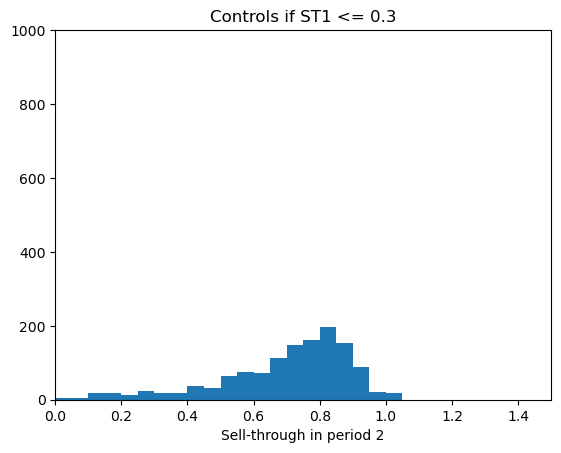

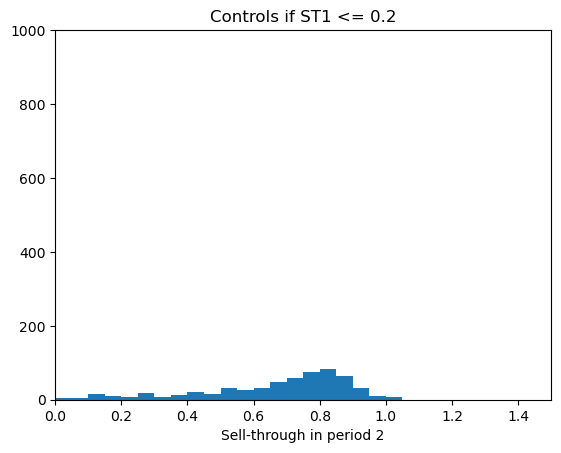

In [20]:
# More charts - some not in slide packet...

# ST2 when ST1 <= 40% PL

plt.hist(data_all_p4p['ST2'], bins = np.arange(0,np.max(data_all_p4p['ST2']),0.05))
plt.ylim([0,400])
plt.xlim([0,1.5])
plt.xlabel('Sell-through in period 2')
plt.title('ProfitLogic')
plt.show()

values = [0.4, 0.3, 0.2]
for i in range(len(values)):
    val = values[i]
    tmp = data_all_p4p[data_all_p4p['regular_sellThru'] < val]['ST2']
    plt.hist(tmp, bins = np.arange(0,np.max(tmp)+0.05,0.05))
    plt.ylim([0,400])
    plt.xlim([0,1.5])
    plt.xlabel('Sell-through in period 2')
    plt.title('ProfitLogic if ST1 <= '+str(val))
    plt.show()
    
# ST2 when ST1 <= 40% Controls

plt.hist(data_all_ctrl['ST2'], bins = np.arange(0,np.max(data_all_ctrl['ST2']),0.05))
plt.ylim([0,1000])
plt.xlim([0,1.5])
plt.xlabel('Sell-through in period 2')
plt.title('Controls')
plt.show()

values = [0.4, 0.3, 0.2]
for i in range(len(values)):
    val = values[i]
    tmp = data_all_ctrl[data_all_ctrl['regular_sellThru'] < val]['ST2']
    plt.hist(tmp, bins = np.arange(0,np.max(tmp)+0.05,0.05))
    plt.ylim([0,1000])
    plt.xlim([0,1.5])
    plt.xlabel('Sell-through in period 2')
    plt.title('Controls if ST1 <= '+str(val))
    plt.show()

C:\Users\manas\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.03 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\manas\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.03 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\manas\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.03 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\manas\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is d

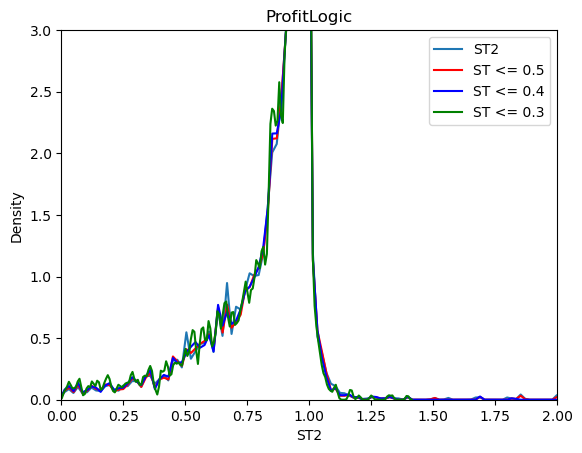

C:\Users\manas\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.04 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\manas\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.04 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\manas\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.04 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\manas\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is d

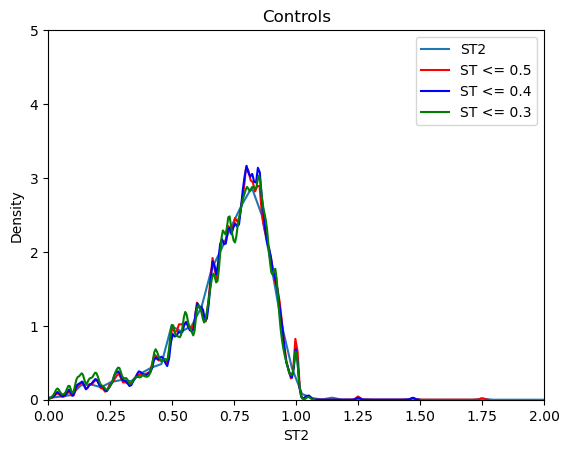

In [21]:
# ST2 by various ST1

a = data_all_p4p['ST2']
b = data_all_p4p[data_all_p4p['regular_sellThru'] <= 0.5]['ST2']
c = data_all_p4p[data_all_p4p['regular_sellThru'] <= 0.4]['ST2']
d = data_all_p4p[data_all_p4p['regular_sellThru'] <= 0.3]['ST2']
sns.kdeplot(a, bw=0.03, legend = True)
sns.kdeplot(b, bw=0.03, legend = True, color = 'r')
sns.kdeplot(c, bw=0.03, legend = True, color = 'b')
sns.kdeplot(d, bw=0.03, legend = True, color = 'g')
plt.xlim([0,2])
plt.ylim([0,3])
plt.ylabel('Density')
plt.title('ProfitLogic')
plt.legend(("ST2","ST <= 0.5", "ST <= 0.4", "ST <= 0.3"), loc = 1)
plt.show()


a = data_all_ctrl['ST2']
b = data_all_ctrl[data_all_ctrl['regular_sellThru'] <= 0.5]['ST2']
c = data_all_ctrl[data_all_ctrl['regular_sellThru'] <= 0.4]['ST2']
d = data_all_ctrl[data_all_ctrl['regular_sellThru'] <= 0.3]['ST2']
sns.kdeplot(a, bw=0.04, legend = True)
sns.kdeplot(b, bw=0.04, legend = True, color = 'r')
sns.kdeplot(c, bw=0.04, legend = True, color = 'b')
sns.kdeplot(d, bw=0.04, legend = True, color = 'g')
plt.xlim([0,2])
plt.ylim([0,5])
plt.ylabel('Density')
plt.title('Controls')
plt.legend(("ST2","ST <= 0.5", "ST <= 0.4", "ST <= 0.3"), loc = 1)
plt.show()


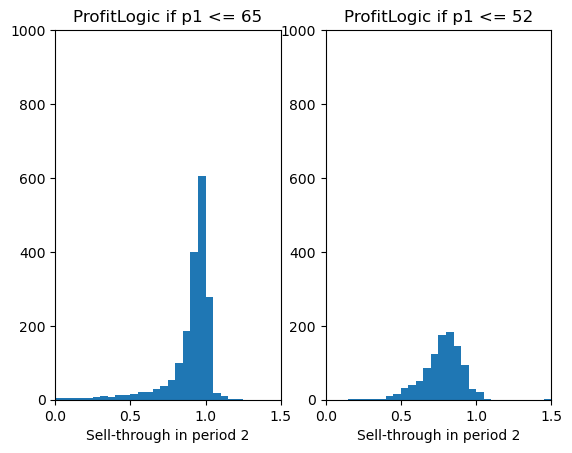

Dept
68     0.720788
71     0.576350
75     0.718843
92     0.546250
111    0.658830
113    0.574405
114    0.797468
118    0.768695
122    0.777534
143    0.791835
144    0.796630
145    0.511130
152    0.784224
154    0.800580
162    0.449843
164    0.735174
172    0.486573
178    0.650243
193    0.747783
194    0.771590
195    0.568817
196    0.848175
197    0.814795
209    0.784626
461    0.879014
463    0.812338
485    0.682107
616    0.838253
644    0.787380
670    0.828310
675    0.798372
677    0.827948
679    0.771292
701    0.738133
713    0.595496
718    0.749566
719    0.710173
736    0.909074
778    0.843754
779    0.798217
879    0.889365
899    0.674693
Name: ST2, dtype: float64

In [22]:
# ST2 by p1
  
plt.subplot(1,2,1)
tmp1 = data_all_p4p[data_all_p4p['p1'] <= 65]['ST2']
plt.hist(tmp1, bins = np.arange(0, max(tmp1),0.05))
plt.xlim([0,1.5])
plt.ylim([0,1000])
plt.xlabel('Sell-through in period 2')
plt.title('ProfitLogic if p1 <= 65')

plt.subplot(1,2,2)
tmp2 = data_all_ctrl[data_all_ctrl['p1'] <= 52]['ST2']
plt.hist(tmp2, bins = np.arange(0, max(tmp2),0.05))
plt.xlim([0,1.5])
plt.ylim([0,1000])
plt.xlabel('Sell-through in period 2')
plt.title('ProfitLogic if p1 <= 52')

plt.show()

data_all_p4p.groupby(['Dept'])['ST2'].mean()


data_all_ctrl.groupby(['Dept'])['ST2'].mean()


count    3191.000000
mean        0.545817
std         0.362584
min        -4.000000
25%         0.412232
50%         0.630435
75%         0.766667
max         3.228571
Name: ST2_returns, dtype: float64

count    2862.000000
mean        0.263932
std         0.436398
min        -5.000000
25%         0.104674
50%         0.361453
75%         0.528931
max         2.500000
Name: ST2_returns, dtype: float64


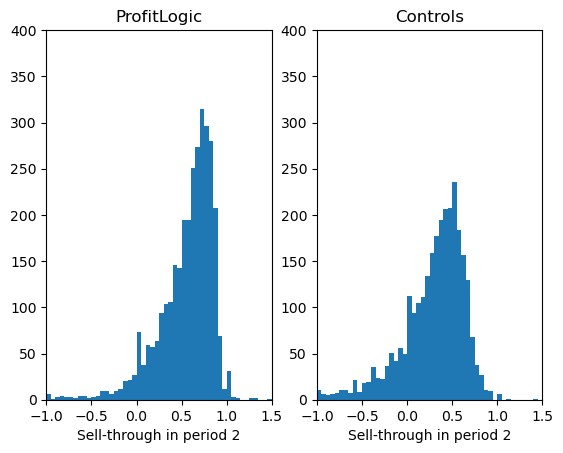

In [23]:
# Considering returns

data_all_p4p['ST2_returns'] = (data_all_p4p['Q2'] - data_all_p4p['full_Rtns']) / (data_all_p4p['regular_num_ordered'] - data_all_p4p['Q1'])
data_all_ctrl['ST2_returns'] = (data_all_ctrl['Q2'] - data_all_ctrl['full_Rtns']) / (data_all_ctrl['regular_num_ordered'] - data_all_ctrl['Q1'])

print(data_all_p4p['ST2_returns'].describe())
print('')
print(data_all_ctrl['ST2_returns'].describe())

plt.subplot(1,2,1)
tmp1 = data_all_p4p['ST2_returns']
plt.hist(tmp1, bins = np.arange(np.min(tmp1), np.max(tmp1),0.05 ))
plt.ylim([0,400])
plt.xlim([-1,1.5])
plt.xlabel('Sell-through in period 2')
plt.title('ProfitLogic')

plt.subplot(1,2,2)
tmp2 = data_all_ctrl['ST2_returns']
plt.hist(tmp2, bins = np.arange(np.min(tmp2), np.max(tmp2), 0.05))
plt.ylim([0,400])
plt.xlim([-1,1.5])
plt.xlabel('Sell-through in period 2')
plt.title('Controls')

plt.show()



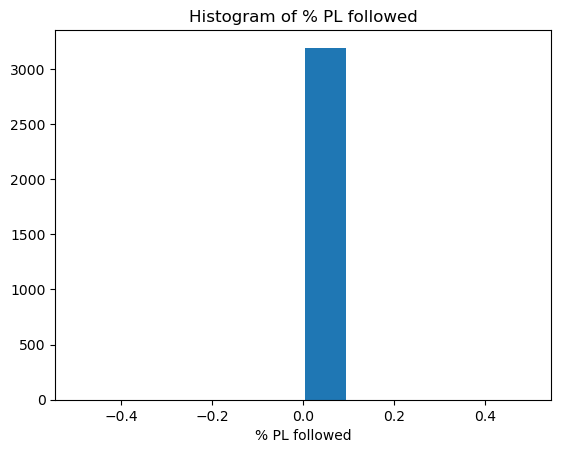

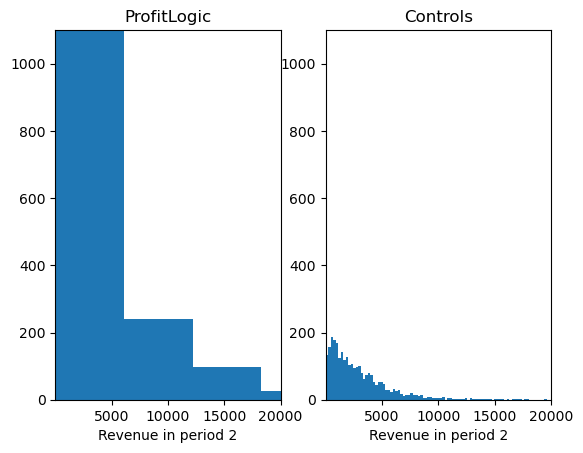

In [24]:
# ProfitLogic "followed" histograms

plt.hist(data_all_p4p['P4P'], rwidth=0.9)
plt.xlabel('% PL followed')
plt.title('Histogram of % PL followed')
plt.show()

# More Revenue in period 2 plots

# Histograms
plt.subplot(1,2,1)
plt.hist(data_all_p4p['R2'], bins = 20)
plt.ylim([0,1100])
plt.xlim([np.min(data_all_p4p['R2']), 20000])
plt.xlabel('Revenue in period 2')
plt.title('ProfitLogic')

plt.subplot(1,2,2)
plt.hist(data_all_ctrl['R2'], bins = 100)
plt.ylim([0,1100])
plt.xlim([np.min(data_all_ctrl['R2']), 20000])
plt.xlabel('Revenue in period 2')
plt.title('Controls')

plt.show()

C:\Users\manas\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 450 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\manas\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 450 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


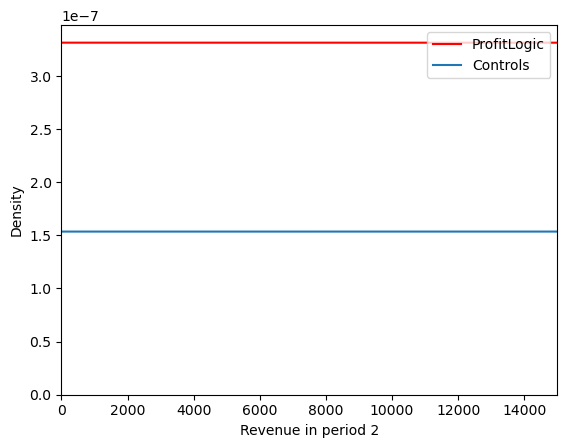

In [25]:
# Densities

a = data_all_ctrl['R2']
b = data_all_p4p['R2']
sns.kdeplot(a, bw=450, legend = True, color = 'r')
sns.kdeplot(b, bw=450, legend = True)

plt.xlabel('Revenue in period 2')
plt.xlim([0,15000])
plt.ylabel('Density')
#plt.title('Controls')
plt.legend(("ProfitLogic","Controls"), loc = 1)
plt.show()
